<a href="https://colab.research.google.com/github/TS0713/DeepLearningMisc/blob/main/TF_Learn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path="/content/drive/MyDrive/Datasets/"

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
os.chdir(data_path)
import glob
import numpy as np
import tensorflow_hub as hub
#!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
glob.glob("*")

['wine-review.csv', 'diabetes.csv']

# Feed Forward Neural Networks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("diabetes.csv")
print (df.head())
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x,np.reshape(y,(-1,1))))
transformed_data = pd.DataFrame(data,columns=df.columns)
transformed_data.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [ ]:
over = RandomOverSampler()
x,y = over.fit_resample(x,y)
data = np.hstack((x,np.reshape(y,(-1,1))))
transformed_data = pd.DataFrame(data,columns=df.columns)
transformed_data.Outcome.value_counts()

1.0    500
0.0    500
Name: Outcome, dtype: int64

In [ ]:
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.4,random_state=0)
x_valid,x_test,y_valid,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=0)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16,activation="relu"),
                             tf.keras.layers.Dense(16,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"]
              )

In [ ]:
model.evaluate(x_train,y_train)

19/19 [==============================] - 0s 1ms/step - loss: 0.7122 - accuracy: 0.4800


[0.7121738195419312, 0.47999998927116394]

In [ ]:
model.evaluate(x_valid,y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4950


[0.7008239030838013, 0.4950000047683716]

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=16,validation_data=(x_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.6190 - accuracy: 0.6767 - val_loss: 0.5597 - val_accuracy: 0.6700
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5248 - accuracy: 0.7417 - val_loss: 0.5431 - val_accuracy: 0.7200
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7617 - val_loss: 0.5228 - val_accuracy: 0.7300
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7567 - val_loss: 0.5170 - val_accuracy: 0.7450
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.7767 - val_loss: 0.4949 - val_accuracy: 0.7600
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.7900 - val_loss: 0.5120 - val_accuracy: 0.7350
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.8033 - val_loss: 0.5201 - val_accuracy: 0.7600
Epoch 8/20
38/38 [==

In [ ]:
model.evaluate(x_valid,y_valid)
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.7950


[0.541871190071106, 0.7950000166893005]

# Reccurrent Neural Networks (LSTM / GRU)

In [ ]:
df = pd.read_csv("wine-review.csv",usecols=["country","description","points","price","variety","winery"])
df.head()
df = df.dropna(subset=["description","points"])
df["label"] = (df.points>=90).astype("int")
print (df.head())
df = df[["description","label"]]

    country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87    NaN   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   

          variety               winery  label  
0     White Blend              Nicosia      0  
1  Portuguese Red  Quinta dos Avidagos      0  
2      Pinot Gris            Rainstorm      0  
3        Riesling           St. Julian      0  
4      Pinot Noir         Sweet Cheeks      0  


In [ ]:
#train,valid,test = np.split(df.sample(frac=1),[int(0.8*len(df)),int(0.9*len(df))])
train,temp = train_test_split(df,test_size=0.2,random_state=0)
test,valid = train_test_split(temp,test_size=0.5,random_state=0)
len(train),len(test),len(valid)

(103976, 12997, 12998)

In [ ]:
# tf.data.Dataset Object then shuffles and batches the data
def df_to_dataset(dataframe,shuffle=True,batch_size=1024):
  df = dataframe.copy()
  labels = df.pop("label")
  df = df["description"]
  ds = tf.data.Dataset.from_tensor_slices((df,labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds



In [ ]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(valid)
test_data = df_to_dataset(test)

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding,dtype=tf.string,trainable=True)

In [ ]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.33074427,  0.11516416,  0.15643081, ..., -0.0158305 ,
        -0.17785321, -0.03116382],
       [ 0.3921425 , -0.14079694, -0.12702002, ..., -0.19536878,
        -0.14964801, -0.33144736],
       [ 0.2837611 , -0.14095743,  0.1281445 , ...,  0.09290203,
        -0.24575616,  0.01007759],
       ...,
       [ 0.47768414,  0.0039114 ,  0.16395175, ..., -0.0788702 ,
        -0.00497365,  0.21156566],
       [ 0.24496916, -0.15456437, -0.04581652, ..., -0.08388113,
         0.13326702,  0.181742  ],
       [ 0.2813262 ,  0.12059779, -0.24460077, ..., -0.3466413 ,
        -0.417991  ,  0.01961769]], dtype=float32)>

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"]
              )

In [ ]:
model.evaluate(train_data)

102/102 [==============================] - 3s 16ms/step - loss: 0.6964 - accuracy: 0.4722


[0.6963731646537781, 0.47223398089408875]

In [ ]:
model.evaluate(valid_data)

13/13 [==============================] - 0s 18ms/step - loss: 0.6967 - accuracy: 0.4680


[0.6966590285301208, 0.4679950773715973]

In [ ]:
history = model.fit(train_data,validation_data = valid_data,epochs=4)

Epoch 1/4
102/102 [==============================] - 59s 574ms/step - loss: 0.3096 - accuracy: 0.8621 - val_loss: 0.3653 - val_accuracy: 0.8340
Epoch 2/4
102/102 [==============================] - 56s 545ms/step - loss: 0.2530 - accuracy: 0.8909 - val_loss: 0.3919 - val_accuracy: 0.8357
Epoch 3/4
102/102 [==============================] - 64s 626ms/step - loss: 0.1940 - accuracy: 0.9190 - val_loss: 0.4411 - val_accuracy: 0.8278
Epoch 4/4
102/102 [==============================] - 56s 547ms/step - loss: 0.1436 - accuracy: 0.9432 - val_loss: 0.5225 - val_accuracy: 0.8259


In [ ]:
model.evaluate(test_data)

13/13 [==============================] - 2s 141ms/step - loss: 0.5269 - accuracy: 0.8268


[0.5269176959991455, 0.8268061876296997]

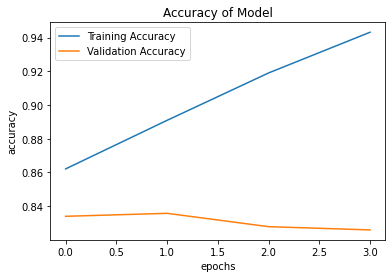

In [ ]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.title("Accuracy of Model")
plt.legend()
plt.show()

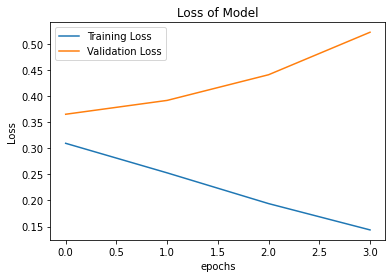

In [ ]:
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.title("Loss of Model")
plt.legend()
plt.show()

# LSTM Model 

In [ ]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))


In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]
len(encoder.get_vocabulary())


2000

In [ ]:
model = tf.keras.Sequential([
                             encoder,
                             tf.keras.layers.Embedding(
                                 input_dim = len(encoder.get_vocabulary()),
                                 output_dim = 32,
                                 mask_zero=True
                             ),
                             tf.keras.layers.LSTM(32),
                             tf.keras.layers.Dense(32,activation="relu"),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(1,activation="sigmoid")


])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"]
              )

In [ ]:
model.evaluate(train_data)

102/102 [==============================] - 35s 296ms/step - loss: 0.6943 - accuracy: 0.4000


[0.6943466067314148, 0.39998653531074524]

In [ ]:
model.evaluate(valid_data)

13/13 [==============================] - 4s 318ms/step - loss: 0.6944 - accuracy: 0.3912


[0.6944301724433899, 0.3912140429019928]

In [ ]:
history = model.fit(train_data,epochs=4,validation_data=valid_data)

Epoch 1/4
102/102 [==============================] - 100s 904ms/step - loss: 0.4602 - accuracy: 0.7789 - val_loss: 0.3729 - val_accuracy: 0.8293
Epoch 2/4
102/102 [==============================] - 51s 494ms/step - loss: 0.3629 - accuracy: 0.8372 - val_loss: 0.3676 - val_accuracy: 0.8227
Epoch 3/4
102/102 [==============================] - 51s 494ms/step - loss: 0.3426 - accuracy: 0.8448 - val_loss: 0.3635 - val_accuracy: 0.8285
Epoch 4/4
102/102 [==============================] - 52s 506ms/step - loss: 0.3265 - accuracy: 0.8525 - val_loss: 0.3626 - val_accuracy: 0.8353


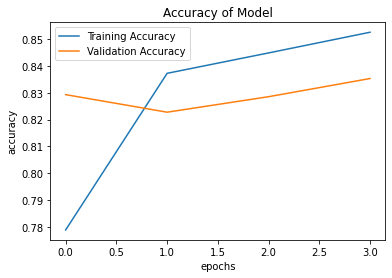

In [ ]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.title("Accuracy of Model")
plt.legend()
plt.show()

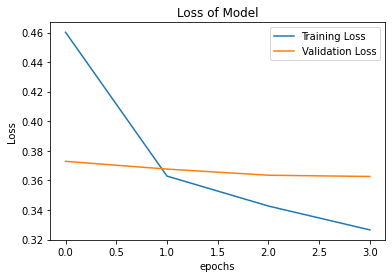

In [ ]:
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.title("Loss of Model")
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_data)

13/13 [==============================] - 2s 190ms/step - loss: 0.3650 - accuracy: 0.8337


[0.3649904131889343, 0.8337308764457703]